### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
pd.options.display.max_columns= None
pd.options.display.max_colwidth= None
pd.options.display.max_rows = None

### Import Data

In [236]:
# df_mixed = pd.read_excel('df_mixed_with_second_model.xlsx')
# df_neg = pd.read_excel('df_neg_with_second_model_Hamrah_Bank_limit.xlsx')
# df_veryneg = pd.read_excel('df_veryneg_with_second_model_Hamrah_Bank_limit.xlsx')
# df_verypos = pd.read_excel('df_verypos_with_second_model_Hamrah_Bank.xlsx')
# df_pos = pd.read_excel('df_pos_with_second_model_Hamrah_Bank.xlsx')
# df_non = pd.read_excel('df_non_with_second_model.xlsx')
# df_mixed.drop('Unnamed: 0',axis=1, inplace=True)
# df_neg.drop('Unnamed: 0',axis=1, inplace=True)
# df_veryneg.drop('Unnamed: 0',axis=1, inplace=True)
# df_pos.drop('Unnamed: 0',axis=1, inplace=True)
# df_verypos.drop('Unnamed: 0',axis=1, inplace=True)
# df_non.drop('Unnamed: 0',axis=1, inplace=True)


# name= 'MegaBank'
# name = 'Hamrah_Bank'
# name = 'Bajet'
# name = 'Bale'
# name = 'Bankino'
name = 'Blu'
# name ='Wepod'

# Define the path to the Excel file
# file_name = '\\mega bank\\df_all_with_second_model_MegaBank_mordad.xlsx'
file_name1 = f'\\{name}\\df_pos_with_second_model_{name}_mordad.xlsx'
file_path1 = 'D:\\DigitalEvolution\\projectsss\\Report of projects\\all sentiment analysis'+file_name1

file_name2 = f'\\{name}\\df_verypos_with_second_model_{name}_mordad.xlsx'
file_path2 = 'D:\\DigitalEvolution\\projectsss\\Report of projects\\all sentiment analysis'+file_name2
# Read the Excel file
df_pos = pd.read_excel(file_path1)
df_verypos = pd.read_excel(file_path2)


df = pd.concat([df_pos,df_verypos])
df.reset_index(inplace=True, drop=True)
df.drop('Unnamed: 0',axis=1, inplace=True)
# name= 'Hamrah Bank'
# df = pd.read_excel('Dec_6_df_negetive_blubank_Bazar.xlsx')
df.head(15)

,comment,rating,year,month,day,General sentiment
0,خوبه,3,1403,5,9,positive
1,راضی هستم و یه بانک همیشه در دسترس هست,5,1403,5,9,positive
2,ممنون از برنامه خوبتان,5,1403,5,12,positive
3,انتقال وجه تمام بانک ها دارن و بقیه خدمات رو حداقل ویپاد وام هفتگی داره و وام های مختلف که باعث شده تنوع ایجاد کنه آخه ده تومن الان وام هست بعد سه ماه,3,1403,5,12,positive
4,جزتشکر از شما چیز دیگری ندارم ممنون از زحمات شما,5,1403,5,12,positive
5,برنامه ی خوبی هست ولی وام نداره و شرایطش سخته.اپیکیشن های مشابه بانک ها امکان وام فوری دارن که بلوبانک نداره . طراحی اپیکیشن که زحمتی نداره اصل کار وام ها و خدمات اعتباری هست که احترام به مشتری هست.ولی اپیکیشن خوبیه,3,1403,5,12,positive
6,برنامه باگ خوره ، پیگیری شود,3,1403,5,12,positive
7,بلوبانک خوبه توصیه میکنم حساب بازکنین وازخدمات بیشتری استفاده کنین,5,1403,5,11,positive
8,خوبه,5,1403,5,11,positive
9,خوبه,5,1403,5,11,positive


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comment            3017 non-null   object
 1   rating             3017 non-null   int64 
 2   year               3017 non-null   int64 
 3   month              3017 non-null   int64 
 4   day                3017 non-null   int64 
 5   General sentiment  3017 non-null   object
dtypes: int64(4), object(2)
memory usage: 141.5+ KB


In [238]:
print(df.columns)

Index(['comment', 'rating', 'year', 'month', 'day', 'General sentiment'], dtype='object')


In [239]:
len(df)

3017

## Preprocessing

In [240]:
def _multiple_replace(mapping, text):
    pattern = "|".join(map(re.escape, mapping.keys()))
    return re.sub(pattern, lambda m: mapping[m.group()], str(text))

def convert_fa_numbers(input_str):
    mapping = {
        '۰': '0',
        '۱': '1',
        '۲': '2',
        '۳': '3',
        '۴': '4',
        '۵': '5',
        '۶': '6',
        '۷': '7',
        '۸': '8',
        '۹': '9',
        '.': '.',
    }
    return _multiple_replace(mapping, input_str)

def convert_en_numbers(input_str):
    mapping = {
         '0': '۰',
         '1' : '۱',
         '2' :'۲',
        '3'  :'۳',
        '4'  :'۴',
        '5' :'۵',
        '6' :'۶',
        '7' :'۷',
        '8' :'۸',
        '9' :'۹',
        '.' :'.'
    }
    return _multiple_replace(mapping, input_str)

def convert_ar_characters(input_str):
    """
    Converts Arabic chars to related Persian unicode char
    :param input_str: String contains Arabic chars
    :return: New str with converted arabic chars
    """
    mapping = {
        'ك': 'ک',
        'ى': 'ی',
        'ي': 'ی',
        'ئ':'ی',
        'إ':'ا',
        'أ':'ا',
        'ة':'ه',
        'ؤ':'و'
    }
    return _multiple_replace(mapping, input_str)

def preprocess(text):
    text = convert_fa_numbers(text)
    text = convert_ar_characters(text)
    text = text.strip()
    removelist = "<>"
    # text = re.sub(r'[^\w'+removelist+']', ' ', text)
    # text = re.sub(r'[^\w]', ' ', text)
    # text = re.sub(r'((#)[\w]*)','#',text)
    text = text.replace('\u200c', ' ')
    text = re.sub(r'[\s]{2,}', ' ', text)
    text = re.sub(r'(\w)\1{2,}', r'\1\1',text)
    text = re.sub(r' [\d+]', ' ',text)
    text = re.sub(r'[^\w]', ' ',text)
    text = convert_en_numbers(text)
    text = re.sub(r'[\d]+',' ',text)
    text = convert_ar_characters(text)
    # remove punctuations
    text= re.sub(r'[^\w]', ' ', text)
    return(text)

In [241]:
# applyinig preprocess function on text
df['preprocess_comment'] = df['comment'].apply(lambda x: preprocess(x))

In [242]:
# removing name column for security reason
df.head(10)

,comment,rating,year,month,day,General sentiment,preprocess_comment
0,خوبه,3,1403,5,9,positive,خوبه
1,راضی هستم و یه بانک همیشه در دسترس هست,5,1403,5,9,positive,راضی هستم و یه بانک همیشه در دسترس هست
2,ممنون از برنامه خوبتان,5,1403,5,12,positive,ممنون از برنامه خوبتان
3,انتقال وجه تمام بانک ها دارن و بقیه خدمات رو حداقل ویپاد وام هفتگی داره و وام های مختلف که باعث شده تنوع ایجاد کنه آخه ده تومن الان وام هست بعد سه ماه,3,1403,5,12,positive,انتقال وجه تمام بانک ها دارن و بقیه خدمات رو حداقل ویپاد وام هفتگی داره و وام های مختلف که باعث شده تنوع ایجاد کنه آخه ده تومن الان وام هست بعد سه ماه
4,جزتشکر از شما چیز دیگری ندارم ممنون از زحمات شما,5,1403,5,12,positive,جزتشکر از شما چیز دیگری ندارم ممنون از زحمات شما
5,برنامه ی خوبی هست ولی وام نداره و شرایطش سخته.اپیکیشن های مشابه بانک ها امکان وام فوری دارن که بلوبانک نداره . طراحی اپیکیشن که زحمتی نداره اصل کار وام ها و خدمات اعتباری هست که احترام به مشتری هست.ولی اپیکیشن خوبیه,3,1403,5,12,positive,برنامه ی خوبی هست ولی وام نداره و شرایطش سخته اپیکیشن های مشابه بانک ها امکان وام فوری دارن که بلوبانک نداره طراحی اپیکیشن که زحمتی نداره اصل کار وام ها و خدمات اعتباری هست که احترام به مشتری هست ولی اپیکیشن خوبیه
6,برنامه باگ خوره ، پیگیری شود,3,1403,5,12,positive,برنامه باگ خوره پیگیری شود
7,بلوبانک خوبه توصیه میکنم حساب بازکنین وازخدمات بیشتری استفاده کنین,5,1403,5,11,positive,بلوبانک خوبه توصیه میکنم حساب بازکنین وازخدمات بیشتری استفاده کنین
8,خوبه,5,1403,5,11,positive,خوبه
9,خوبه,5,1403,5,11,positive,خوبه


### Remove Stopwords

In [243]:
# ## using tf-idf to find more stopwords
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()

# vectors = vectorizer.fit_transform(df['preprocess_comment'])

# feature_names = vectorizer.get_feature_names()

# dense = vectors.todense()
# denselist = dense.tolist()
# df_tfidf = pd.DataFrame(denselist, columns=feature_names)

In [244]:
# df_tfidf.sum().sort_values(ascending=False)

In [245]:
# import os

# path = "D:\Digital Evolution\Text Mining_ Mega Bank"

# # Check current working directory.
# retval = os.getcwd()

# print ("Current working directory %s" % retval)

# # Now change the directory
# os.chdir( path )

# # Check current working directory.
# retval = os.getcwd()

# print( "Directory changed successfully %s" % retval)

In [246]:
## Adding new stopwords with general one. The complete file is 'stopwords3'

# with open('stopwords3.txt','r', encoding = 'utf-8') as st:
# with new stopwords
# with open('stopwords_neg_ mega_2model.txt','r', encoding = 'utf-8') as st:
stop_path = 'D:\\DigitalEvolution\\projectsss\\Report of projects\\all sentiment analysis\\stopwords\\'
with open(stop_path + 'Dec_stopwords_pos.txt','r', encoding = 'utf-8') as st:
    t = st.readlines()
    stp = [i.strip() for i in t]
    stopwords = set(stp)
    
    
# with open('Dec_stopwords_pos.txt','r', encoding = 'utf-8') as st:
#     t = st.readlines()
#     stp = [i.strip() for i in t]
#     stopwords = set(stp)

In [247]:
stopwords

{'.',
 'N',
 'آخر',
 'آخرش',
 'آخه',
 'آره',
 'آمد',
 'آمده',
 'آن',
 'آن ها',
 'آنها',
 'آیا',
 'احتمالا',
 'ادامه',
 'اره',
 'از',
 'ازش',
 'است',
 'استفاده',
 'اسم',
 'اش',
 'اصلا',
 'اضافه',
 'افتاد',
 'افتاده',
 'افزار',
 'الان',
 'البته',
 'ام',
 'اما',
 'امروز',
 'امشب',
 'ان',
 'انجام',
 'اند',
 'اندازه',
 'اندرکاران',
 'انقد',
 'انقدر',
 'انگار',
 'او',
 'اول',
 'اولین',
 'اومد',
 'اومده',
 'اون',
 'اون ها',
 'اونا',
 'اونایی',
 'اونجا',
 'اونم',
 'اونها',
 'اونی',
 'اين',
 'اکنون',
 'اگر',
 'اگه',
 'ای',
 'ایانیازبه',
 'ایشون',
 'ایم',
 'این',
 'این ها',
 'اینا',
 'اینجا',
 'اینجوری',
 'اینقدر',
 'اینم',
 'اینه',
 'اینها',
 'اینو',
 'اینکه',
 'با',
 'بار',
 'باز',
 'بازم',
 'بازگردند',
 'باسلام',
 'باش',
 'باشد',
 'باشم',
 'باشه',
 'باشی',
 'باشید',
 'باشیم',
 'باعث',
 'بالا',
 'بالاخره',
 'بانکها',
 'باید',
 'ببین',
 'ببینید',
 'بخاطر',
 'بخیر',
 'بد',
 'بدتر',
 'بدتره',
 'بدم',
 'بده',
 'بدون',
 'بدی',
 'بدید',
 'بدیم',
 'بر',
 'برا',
 'برابر',
 'برای',
 'برخی',
 'برد',
 'ب

In [248]:
len(stopwords)

481

In [249]:
## remove stop words
df['comment_no_stp']= df['preprocess_comment'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))

In [250]:
df.head(15)

,comment,rating,year,month,day,General sentiment,preprocess_comment,comment_no_stp
0,خوبه,3,1403,5,9,positive,خوبه,خوبه
1,راضی هستم و یه بانک همیشه در دسترس هست,5,1403,5,9,positive,راضی هستم و یه بانک همیشه در دسترس هست,راضی بانک دسترس
2,ممنون از برنامه خوبتان,5,1403,5,12,positive,ممنون از برنامه خوبتان,برنامه خوبتان
3,انتقال وجه تمام بانک ها دارن و بقیه خدمات رو حداقل ویپاد وام هفتگی داره و وام های مختلف که باعث شده تنوع ایجاد کنه آخه ده تومن الان وام هست بعد سه ماه,3,1403,5,12,positive,انتقال وجه تمام بانک ها دارن و بقیه خدمات رو حداقل ویپاد وام هفتگی داره و وام های مختلف که باعث شده تنوع ایجاد کنه آخه ده تومن الان وام هست بعد سه ماه,انتقال وجه بانک خدمات ویپاد وام هفتگی وام مختلف تنوع ایجاد وام
4,جزتشکر از شما چیز دیگری ندارم ممنون از زحمات شما,5,1403,5,12,positive,جزتشکر از شما چیز دیگری ندارم ممنون از زحمات شما,جزتشکر دیگری زحمات
5,برنامه ی خوبی هست ولی وام نداره و شرایطش سخته.اپیکیشن های مشابه بانک ها امکان وام فوری دارن که بلوبانک نداره . طراحی اپیکیشن که زحمتی نداره اصل کار وام ها و خدمات اعتباری هست که احترام به مشتری هست.ولی اپیکیشن خوبیه,3,1403,5,12,positive,برنامه ی خوبی هست ولی وام نداره و شرایطش سخته اپیکیشن های مشابه بانک ها امکان وام فوری دارن که بلوبانک نداره طراحی اپیکیشن که زحمتی نداره اصل کار وام ها و خدمات اعتباری هست که احترام به مشتری هست ولی اپیکیشن خوبیه,برنامه خوبی وام شرایطش سخته اپیکیشن مشابه بانک امکان وام فوری بلوبانک طراحی اپیکیشن زحمتی اصل وام خدمات اعتباری احترام مشتری اپیکیشن خوبیه
6,برنامه باگ خوره ، پیگیری شود,3,1403,5,12,positive,برنامه باگ خوره پیگیری شود,برنامه باگ خوره پیگیری
7,بلوبانک خوبه توصیه میکنم حساب بازکنین وازخدمات بیشتری استفاده کنین,5,1403,5,11,positive,بلوبانک خوبه توصیه میکنم حساب بازکنین وازخدمات بیشتری استفاده کنین,بلوبانک خوبه توصیه حساب بازکنین وازخدمات بیشتری
8,خوبه,5,1403,5,11,positive,خوبه,خوبه
9,خوبه,5,1403,5,11,positive,خوبه,خوبه


In [251]:
len(df)

3017

In [252]:
df_pivot = df.pivot_table(index=['year','month','General sentiment'],values=['rating'],aggfunc='count')

In [253]:
df_pivot

rating
year month General sentiment        
1402 10    positive                4
           very positive          10
     11    positive                5
           very positive           5
     12    positive               84
           very positive         302
1403 1     positive              117
           very positive         330
     2     positive              126
           very positive         414
     3     positive              150
           very positive         346
     4     positive               97
           very positive         232
     5     positive              107
           very positive         688

In [254]:
df_melt = df_pivot.copy()
df_melt.reset_index(inplace=True)
df_melt

,year,month,General sentiment,rating
0,1402,10,positive,4
1,1402,10,very positive,10
2,1402,11,positive,5
3,1402,11,very positive,5
4,1402,12,positive,84
5,1402,12,very positive,302
6,1403,1,positive,117
7,1403,1,very positive,330
8,1403,2,positive,126
9,1403,2,very positive,414


Text(0.5, 0, 'year')

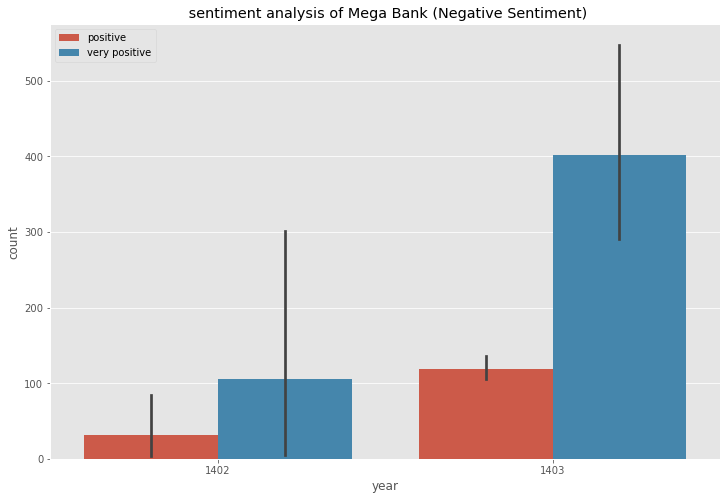

In [255]:
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
# sns.plot(data=tabel1, x=sum_install , y='Month_bidi')
sns.barplot(x='year', y='rating',hue='General sentiment', data=df_melt)
plt.ylabel('count')
plt.legend()
plt.title(' sentiment analysis of Mega Bank (Negative Sentiment)')
plt.xlabel('year')

# limitation

In [256]:
df_pos_limited_4 = df[((df['year']==1402) & (df['month']==4))]

df_pos_limited_4

,comment,rating,year,month,day,General sentiment,preprocess_comment,comment_no_stp


In [257]:
df_pos_limited_4.shape

(0, 8)

In [258]:
df_pos_limited_4.to_excel("df_positive_4 month_hamrahbank.xlsx")

### Using Wordcloud-fa for visualizing results

In [259]:
!pip install wordcloud-fa

In [260]:
from wordcloud_fa import WordCloudFa

In [261]:
wordcloud = WordCloudFa()

In [262]:
wordcloud = WordCloudFa(no_reshape=False, persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)

wc = wordcloud.generate(' '.join(df['comment_no_stp'].tolist()))
image = wc.to_image()
image.show()
image.save(f'topwords_wordcloud_{name}.png')

### Calculating the number of words

In [263]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
        vec=CountVectorizer().fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

In [264]:
common_words = get_top_n_words(df['comment_no_stp'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head(20)

,Review,count
0,عالی,1343
1,کد,644
2,برنامه,465
3,بانک,256
4,معرف,234
5,بزنید,225
6,کارت,212
7,وام,211
8,خوبه,204
9,خوب,181


In [265]:
# using arabic reshaper for correcting bar plot figures
!pip install --upgrade arabic-reshaper

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 203, in wrapper
    return func(self, options, args)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 315, in run
    requirement_set = resolver.resolve(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 94, in resolve
    result = self._result = resolver.resolve(
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 472, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 341, in resolve
    self._add_to_criteria(self.state.criteria, r, parent=None)
  Fi

In [266]:
!pip install python-bidi

In [267]:
import arabic_reshaper
from bidi.algorithm import get_display
 
def bidi(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

In [268]:
# df1['review'] = df1['Review'].apply(lambda x: bidi(x))

In [269]:
# df1.groupby('review').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar',
#     figsize=(10, 6),
#     xlabel = "Top Words",
#     ylabel = "Count",
#     title = "Bar Chart of Top Words Frequency",
# )

In [270]:
##########

### Using N-Gram

In [271]:
def get_top_n_bigram(corpus, n=None, gram=2):
    vec = CountVectorizer(ngram_range=(gram,gram)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [272]:
## Bigram
common_words2 = get_top_n_bigram(df['comment_no_stp'], gram=2, n=30)
df2 = pd.DataFrame(common_words2, columns = ['Review', 'count'])

In [273]:
df2.head(20)

,Review,count
0,کد معرف,219
1,کد دعوت,151
2,برنامه خوبیه,84
3,عالی عالی,82
4,ثبت نام,76
5,کد بزنید,66
6,برنامه عالی,57
7,فوق العاده,48
8,معرف بزنید,46
9,دوستان کد,43


In [274]:
df2['review'] = df2['Review'].apply(lambda x: bidi(x))

In [275]:
# #plotting bar plot for Bigram 
# df2.groupby('review').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar',
#     figsize=(10, 6),
#     xlabel = "Top Words",
#     ylabel = "Count",
#     title = "Bar Chart of Top Bigram Frequency",
# )

### Defining new function for applying N-gram in order to show wordcloud

In [276]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=2):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [277]:
## creating 2 new colunms ---> Bigram and Trigram 
df["bigram_text_wordcloud"] = df['comment_no_stp'].apply(get_ngrams, n=2)
df["trigram_text_wordcloud"] = df['comment_no_stp'].apply(get_ngrams, n=3)
df.head(20)

,comment,rating,year,month,day,General sentiment,preprocess_comment,comment_no_stp,bigram_text_wordcloud,trigram_text_wordcloud
0,خوبه,3,1403,5,9,positive,خوبه,خوبه,,
1,راضی هستم و یه بانک همیشه در دسترس هست,5,1403,5,9,positive,راضی هستم و یه بانک همیشه در دسترس هست,راضی بانک دسترس,راضی_بانک بانک_دسترس,راضی_بانک_دسترس
2,ممنون از برنامه خوبتان,5,1403,5,12,positive,ممنون از برنامه خوبتان,برنامه خوبتان,برنامه_خوبتان,
3,انتقال وجه تمام بانک ها دارن و بقیه خدمات رو حداقل ویپاد وام هفتگی داره و وام های مختلف که باعث شده تنوع ایجاد کنه آخه ده تومن الان وام هست بعد سه ماه,3,1403,5,12,positive,انتقال وجه تمام بانک ها دارن و بقیه خدمات رو حداقل ویپاد وام هفتگی داره و وام های مختلف که باعث شده تنوع ایجاد کنه آخه ده تومن الان وام هست بعد سه ماه,انتقال وجه بانک خدمات ویپاد وام هفتگی وام مختلف تنوع ایجاد وام,انتقال_وجه وجه_بانک بانک_خدمات خدمات_ویپاد ویپاد_وام وام_هفتگی هفتگی_وام وام_مختلف مختلف_تنوع تنوع_ایجاد ایجاد_وام,انتقال_وجه_بانک وجه_بانک_خدمات بانک_خدمات_ویپاد خدمات_ویپاد_وام ویپاد_وام_هفتگی وام_هفتگی_وام هفتگی_وام_مختلف وام_مختلف_تنوع مختلف_تنوع_ایجاد تنوع_ایجاد_وام
4,جزتشکر از شما چیز دیگری ندارم ممنون از زحمات شما,5,1403,5,12,positive,جزتشکر از شما چیز دیگری ندارم ممنون از زحمات شما,جزتشکر دیگری زحمات,جزتشکر_دیگری دیگری_زحمات,جزتشکر_دیگری_زحمات
5,برنامه ی خوبی هست ولی وام نداره و شرایطش سخته.اپیکیشن های مشابه بانک ها امکان وام فوری دارن که بلوبانک نداره . طراحی اپیکیشن که زحمتی نداره اصل کار وام ها و خدمات اعتباری هست که احترام به مشتری هست.ولی اپیکیشن خوبیه,3,1403,5,12,positive,برنامه ی خوبی هست ولی وام نداره و شرایطش سخته اپیکیشن های مشابه بانک ها امکان وام فوری دارن که بلوبانک نداره طراحی اپیکیشن که زحمتی نداره اصل کار وام ها و خدمات اعتباری هست که احترام به مشتری هست ولی اپیکیشن خوبیه,برنامه خوبی وام شرایطش سخته اپیکیشن مشابه بانک امکان وام فوری بلوبانک طراحی اپیکیشن زحمتی اصل وام خدمات اعتباری احترام مشتری اپیکیشن خوبیه,برنامه_خوبی خوبی_وام وام_شرایطش شرایطش_سخته سخته_اپیکیشن اپیکیشن_مشابه مشابه_بانک بانک_امکان امکان_وام وام_فوری فوری_بلوبانک بلوبانک_طراحی طراحی_اپیکیشن اپیکیشن_زحمتی زحمتی_اصل اصل_وام وام_خدمات خدمات_اعتباری اعتباری_احترام احترام_مشتری مشتری_اپیکیشن اپیکیشن_خوبیه,برنامه_خوبی_وام خوبی_وام_شرایطش وام_شرایطش_سخته شرایطش_سخته_اپیکیشن سخته_اپیکیشن_مشابه اپیکیشن_مشابه_بانک مشابه_بانک_امکان بانک_امکان_وام امکان_وام_فوری وام_فوری_بلوبانک فوری_بلوبانک_طراحی بلوبانک_طراحی_اپیکیشن طراحی_اپیکیشن_زحمتی اپیکیشن_زحمتی_اصل زحمتی_اصل_وام اصل_وام_خدمات وام_خدمات_اعتباری خدمات_اعتباری_احترام اعتباری_احترام_مشتری احترام_مشتری_اپیکیشن مشتری_اپیکیشن_خوبیه
6,برنامه باگ خوره ، پیگیری شود,3,1403,5,12,positive,برنامه باگ خوره پیگیری شود,برنامه باگ خوره پیگیری,برنامه_باگ باگ_خوره خوره_پیگیری,برنامه_باگ_خوره باگ_خوره_پیگیری
7,بلوبانک خوبه توصیه میکنم حساب بازکنین وازخدمات بیشتری استفاده کنین,5,1403,5,11,positive,بلوبانک خوبه توصیه میکنم حساب بازکنین وازخدمات بیشتری استفاده کنین,بلوبانک خوبه توصیه حساب بازکنین وازخدمات بیشتری,بلوبانک_خوبه خوبه_توصیه توصیه_حساب حساب_بازکنین بازکنین_وازخدمات وازخدمات_بیشتری,بلوبانک_خوبه_توصیه خوبه_توصیه_حساب توصیه_حساب_بازکنین حساب_بازکنین_وازخدمات بازکنین_وازخدمات_بیشتری
8,خوبه,5,1403,5,11,positive,خوبه,خوبه,,
9,خوبه,5,1403,5,11,positive,خوبه,خوبه,,


In [278]:
## test wordcloud for bigram
from wordcloud_fa import WordCloudFa
wodcloud = WordCloudFa(no_reshape=False, persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)

wc = wodcloud.generate(' '.join(df["bigram_text_wordcloud"].tolist()))
image = wc.to_image()
image.show()
image.save(f'Bigram_wordcloud_positive_{name}_all the time.png')
# image.save('Bigram_wordcloud_negative_megabank_limit time.png')

In [279]:
### Trigram

In [280]:
common_words3 = get_top_n_bigram(df['comment_no_stp'], gram=3, n=30)
df3 = pd.DataFrame(common_words3, columns = ['Review', 'count'])

In [281]:
df3.head(20)

,Review,count
0,کد معرف بزنید,44
1,کد دعوت بزنید,38
2,عالی عالی عالی,31
3,ثبت نام کد,25
4,قسمت کد معرف,19
5,کد معرف کد,19
6,دوستان کد معرف,16
7,کارت مشکی بگیرم,14
8,نصب کد معرف,14
9,نام کد معرف,11


In [282]:
df3['review'] = df3['Review'].apply(lambda x: bidi(x))

In [283]:
# # #plotting bar plot for Trigram 
# df3.groupby('review').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar',
#     figsize=(10, 6),
#     xlabel = "Top Words",
#     ylabel = "Count",
#     title = "Bar Chart of Top Trigram Frequency",
# )

In [284]:
wodcloud = WordCloudFa(no_reshape=False, persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)

wc = wodcloud.generate(' '.join(df["trigram_text_wordcloud"].tolist()))
image = wc.to_image()
image.show()
image.save(f'trigram-wordcloud_positive_{name}_all the time.png')
# image.save('trigram-wordcloud_negative_megabank_limit time.png')

In [285]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


In [286]:
bubble_chart = BubbleChart(area=list(df2['count'][:10]),
                           bubble_spacing=0.1)
bubble_chart.collapse()
color= ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green']

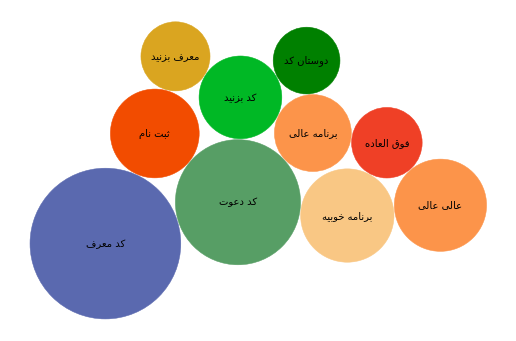

In [287]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, list(df2['review'][:10]), color)
ax.set_facecolor("white")
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()

In [288]:
bubble_chart = BubbleChart(area=list(df3['count'][:11]),
                           bubble_spacing=0.1)
bubble_chart.collapse()
color= ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825', '#FC944A', '#EF4026',
              'goldenrod','green', '#F9C784', '#FC944A',
              'coral','#F24C00','#FC944A',]

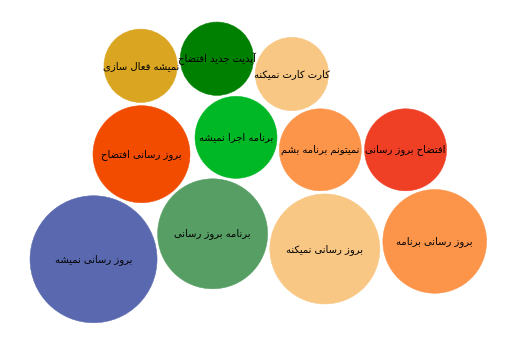

In [53]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, list(df3['review'][:11]), color)
ax.set_facecolor("white")
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()